Here We have dataset of online wine selling store

Problem Statement:
<ul><li>
Analysis Of Data</li>
<li>
Build predictive model for variety of grapes which is used in wine based on available features</li></ul>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stat
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import BernoulliNB
from catboost import CatBoostClassifier, Pool
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import re
stop_words=set(stopwords.words('english'))

In [0]:
train_data = pd.read_csv("C:/Users/RetailAdmin/Desktop/Knight ML Assignment/Data/train.csv")

In [0]:
test_data = pd.read_csv("C:/Users/RetailAdmin/Desktop/Knight ML Assignment/Data/test.csv")

<b>The Data Description is as follows:</b>

•	user_name - user_name of the reviewer

•	country -The country that the wine is from.

•	review_title - The title of the wine review, which often contains the vintage.

•	review_description - A verbose review of the wine.

•	designation - The vineyard within the winery where the grapes that made the wine are from.

•	points - ratings given by the user. The ratings are between 0 -100.

•	price - The cost for a bottle of the wine

•	province - The province or state that the wine is from.

•	region_1 - The wine-growing area in a province or state (ie Napa).

•	region_2 - Sometimes there are more specific regions specified within a wine-growing area (ie Rutherford inside the Napa Valley), but this value can sometimes be blank.

•	winery - The winery that made the wine

•	variety - The type of grapes used to make the wine. Dependent variable for problem statement


# DATA EXPLORATION

In [7]:
train_data.head()

,user_name,country,review_title,review_description,designation,points,price,province,region_1,region_2,winery,variety
0,NaN,Australia,Andrew Peace 2007 Peace Family Vineyard Chardo...,"Classic Chardonnay aromas of apple, pear and h...",Peace Family Vineyard,83,10.0,Australia Other,South Eastern Australia,NaN,Andrew Peace,Chardonnay
1,@wawinereport,US,North by Northwest 2014 Red (Columbia Valley (...,This wine is near equal parts Syrah and Merlot...,NaN,89,15.0,Washington,Columbia Valley (WA),Columbia Valley,North by Northwest,Red Blend
2,NaN,Italy,Renato Ratti 2007 Conca (Barolo),Barolo Conca opens with inky dark concentratio...,Conca,94,80.0,Piedmont,Barolo,NaN,Renato Ratti,Nebbiolo
3,@vossroger,France,Domaine l'Ancienne Cure 2010 L'Abbaye White (B...,It's impressive what a small addition of Sauvi...,L'Abbaye,87,22.0,Southwest France,Bergerac Sec,NaN,Domaine l'Ancienne Cure,Bordeaux-style White Blend
4,@vossroger,France,Château du Cèdre 2012 Le Cèdre Vintage Malbec ...,"This ripe, sweet wine is rich and full of drie...",Le Cèdre Vintage,88,33.0,France Other,Vin de Liqueur,NaN,Château du Cèdre,Malbec


In [8]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82657 entries, 0 to 82656
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   user_name           63264 non-null  object 
 1   country             82622 non-null  object 
 2   review_title        82657 non-null  object 
 3   review_description  82657 non-null  object 
 4   designation         59010 non-null  object 
 5   points              82657 non-null  int64  
 6   price               77088 non-null  float64
 7   province            82622 non-null  object 
 8   region_1            69903 non-null  object 
 9   region_2            35949 non-null  object 
 10  winery              82657 non-null  object 
 11  variety             82657 non-null  object 
dtypes: float64(1), int64(1), object(10)
memory usage: 7.6+ MB


<b>We have total 82657 rows and 12 columns</b>

We have only two numerical feature, all remaining ten columns are categorical.

There are also <b>null values</b> in some of the column which we will handle later.

In [9]:
train_data.describe()

,points,price
count,82657.000000,77088.000000
mean,88.544564,36.922232
std,3.099649,43.698346
min,80.000000,4.000000
25%,86.000000,18.000000
50%,88.000000,27.000000
75%,91.000000,45.000000
max,100.000000,3300.000000


<b>Minimum value for points is 80 which means all wines are basically good.

Online Wine store sells wine as cheap as 4 dollar and as costly as 3300 dollar</b>

In [10]:
print("Total Unique Variety :",train_data['variety'].nunique())

print(train_data['variety'].value_counts())

Total Unique Variety : 28
Pinot Noir                    10587
Chardonnay                     9403
Cabernet Sauvignon             7552
Red Blend                      7166
Bordeaux-style Red Blend       5497
Riesling                       4148
Sauvignon Blanc                4011
Syrah                          3316
Rosé                           2831
Merlot                         2471
Nebbiolo                       2242
Zinfandel                      2209
Sangiovese                     2165
Malbec                         2119
Portuguese Red                 1969
White Blend                    1896
Sparkling Blend                1739
Tempranillo                    1448
Rhône-style Red Blend          1182
Pinot Gris                     1148
Champagne Blend                1133
Cabernet Franc                 1095
Grüner Veltliner               1055
Portuguese White                896
Pinot Grigio                    873
Bordeaux-style White Blend      850
Gewürztraminer                  840
Ga

Our target variable has total <b>28 categories</b> which means it is a really complex problem

<b>We could combine some lables based on similarity like Red Blend and White Blend But I will keep all the lable since We do not have more information about owners need.</b>

In [11]:
print(train_data.isnull().sum(),"\n\n")

print(test_data.isnull().sum())

user_name             19393
country                  35
review_title              0
review_description        0
designation           23647
points                    0
price                  5569
province                 35
region_1              12754
region_2              46708
winery                    0
variety                   0
dtype: int64 


user_name              4738
country                   4
review_title              0
review_description        0
designation            5989
points                    0
price                  1394
province                  4
region_1               3314
region_2              11751
winery                    0
dtype: int64


There are too many null values,  now let's decide how we will handle them

# DATA PREPROCESSING

#### Let's first see numeric variables

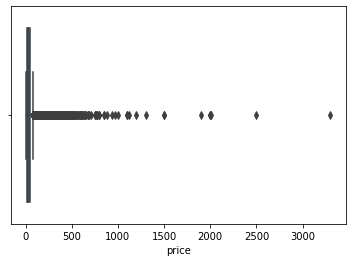

In [12]:
sns.boxplot(train_data['price'])

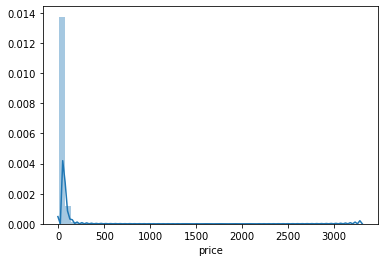

In [13]:
sns.distplot(train_data['price'], kde=True)

<b>We can see that most of wine bottel has price under 500</b> 

There are too many outliers and it is possible that those data point is a mistake and even if it's not a mistake we will <b>replace</b> them because they impact our model badly and we also fill null values with <b>median</b> since data is 
<b>right skewed</b> ,so mean will not be good for central measure.

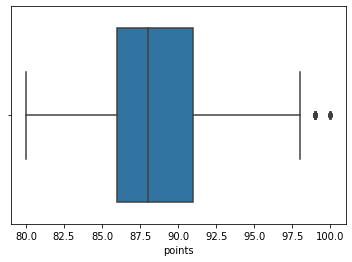

In [14]:
sns.boxplot(train_data['points'])

In [15]:
print((train_data['points'] > 100).any())

False


No errors in points data

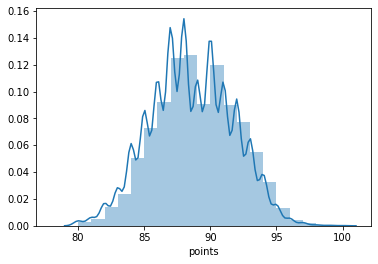

In [16]:
bins = []
for i in range(78,101):
    bins.append(i)
    i+=2
    
sns.distplot(train_data['points'], bins = bins)

Points column has a roughly normal distribution and also it does not have any null values

#### Now Let's see categorical data

In [17]:
print(train_data['country'].nunique())
print(train_data['designation'].nunique())
print(train_data['province'].nunique())
print(train_data['region_1'].nunique())
print(train_data['region_2'].nunique())
print(train_data['winery'].nunique())

38
26424
358
1019
17
13786


In each column, some of the label has very few records which are not sufficient enough to make any prediction so labels which have 
<b>very less</b> frequency will be replaced by <b>"others"</b>

We are going to keep only following values

In [18]:
top_values = {}
for column in ['user_name', 'country', 'designation', 'province', 'region_1', 'region_2', 'winery']:
    top_10 = list(train_data[column].value_counts().sort_values(ascending = False)[:10].index)
    top_values[column] = top_10

top_values

{'country': ['US',
  'France',
  'Italy',
  'Portugal',
  'Chile',
  'Spain',
  'Argentina',
  'Austria',
  'Germany',
  'New Zealand'],
 'designation': ['Reserve',
  'Estate',
  'Reserva',
  'Estate Grown',
  'Riserva',
  'Barrel sample',
  'Dry',
  'Brut',
  'Brut Rosé',
  'Estate Bottled'],
 'province': ['California',
  'Washington',
  'Bordeaux',
  'Oregon',
  'Tuscany',
  'Burgundy',
  'Mendoza Province',
  'Piedmont',
  'New York',
  'Alsace'],
 'region_1': ['Napa Valley',
  'Columbia Valley (WA)',
  'Russian River Valley',
  'California',
  'Willamette Valley',
  'Mendoza',
  'Alsace',
  'Paso Robles',
  'Champagne',
  'Barolo'],
 'region_2': ['Central Coast',
  'Sonoma',
  'Columbia Valley',
  'Napa',
  'Willamette Valley',
  'California Other',
  'Finger Lakes',
  'Napa-Sonoma',
  'Sierra Foothills',
  'Central Valley'],
 'user_name': ['@vossroger',
  '@wineschach',
  '@vboone',
  '@paulgwine\xa0',
  '@kerinokeefe',
  '@mattkettmann',
  '@wawinereport',
  '@JoeCz',
  '@gordone

In [19]:
print(set(test_data.country).difference(set(train_data.country)),"\n")
print(len(list(set(test_data.designation).difference(set(train_data.designation)))),"\n")
print(len(list(set(test_data.province).difference(set(train_data.province)))),"\n")
print(len(list(set(test_data.region_1).difference(set(train_data.region_1)))),"\n")
print(len(list(set(test_data.region_2).difference(set(train_data.region_2)))),"\n")
print(len(list(set(test_data.winery).difference(set(train_data.winery)))),"\n")

{'Slovakia', 'Armenia'} 

3885 

12 

37 

0 

942 



There are some values in test_data which is not present in train_data, we will handle them same way we will replace them others.

Based on above findings we will process data

In [0]:
def process_train_data(temp_data, top_values):
    
    data = temp_data.copy()
    
    data['price'] = np.where((data.price < 1000), data.price, data.price.median())
    data['points'] = np.where((data.points < 100), data.points, data.points.mean())
    
    for column in ['user_name', 'country', 'designation', 'province', 'region_1', 'region_2', 'winery']:
        data[column] = data[column].apply(lambda x: 'Other' if x not in top_values[column] else x)
        
    data['user_name'] = data['user_name'].apply(lambda x:re.sub('[^a-zA-Z ]+','',str(x)))

    return data        

In [21]:
processed_data = process_train_data(train_data, top_values)

processed_data.head()

,user_name,country,review_title,review_description,designation,points,price,province,region_1,region_2,winery,variety
0,Other,Other,Andrew Peace 2007 Peace Family Vineyard Chardo...,"Classic Chardonnay aromas of apple, pear and h...",Other,83.0,10.0,Other,Other,Other,Other,Chardonnay
1,wawinereport,US,North by Northwest 2014 Red (Columbia Valley (...,This wine is near equal parts Syrah and Merlot...,Other,89.0,15.0,Washington,Columbia Valley (WA),Columbia Valley,Other,Red Blend
2,Other,Italy,Renato Ratti 2007 Conca (Barolo),Barolo Conca opens with inky dark concentratio...,Other,94.0,80.0,Piedmont,Barolo,Other,Other,Nebbiolo
3,vossroger,France,Domaine l'Ancienne Cure 2010 L'Abbaye White (B...,It's impressive what a small addition of Sauvi...,Other,87.0,22.0,Other,Other,Other,Other,Bordeaux-style White Blend
4,vossroger,France,Château du Cèdre 2012 Le Cèdre Vintage Malbec ...,"This ripe, sweet wine is rich and full of drie...",Other,88.0,33.0,Other,Other,Other,Other,Malbec


In [22]:
processed_data.isnull().sum()

user_name             0
country               0
review_title          0
review_description    0
designation           0
points                0
price                 0
province              0
region_1              0
region_2              0
winery                0
variety               0
dtype: int64

We have also replaced Null values with "Other" in categorical columns

# Exploratory Data Analysis

In [23]:
processed_data.groupby('variety')['points'].mean().sort_values(ascending=False)[:10]

variety
Nebbiolo                      90.283675
Grüner Veltliner              90.051185
Champagne Blend               89.713632
Riesling                      89.465284
Pinot Noir                    89.417210
Syrah                         89.274893
Rhône-style Red Blend         89.171743
Bordeaux-style Red Blend      89.094266
Portuguese Red                88.774781
Bordeaux-style White Blend    88.679464
Name: points, dtype: float64

<b>Top 10 varieties of wine which are most loved by users.</b>

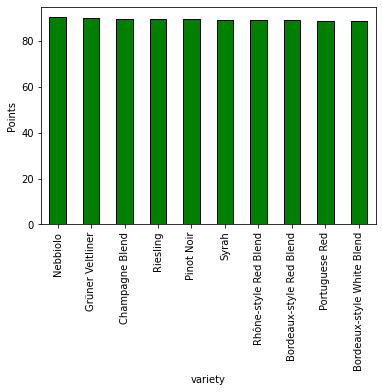

In [24]:
processed_data.groupby('variety')['points'].mean().sort_values(ascending = False)[:10].plot.bar(edgecolor = 'k', color='g')

plt.ylabel('Points')

plt.show()

In [25]:
processed_data.groupby('variety')['price'].mean().sort_values(ascending=False)[:10]

variety
Champagne Blend             65.295675
Nebbiolo                    59.581624
Cabernet Sauvignon          47.656515
Pinot Noir                  46.593369
Sangiovese                  43.048037
Bordeaux-style Red Blend    40.260506
Syrah                       38.959288
Red Blend                   35.632291
Rhône-style Red Blend       34.970389
Cabernet Franc              34.642922
Name: price, dtype: float64

<b>Top 10 varieties of wine which are most costly</b>

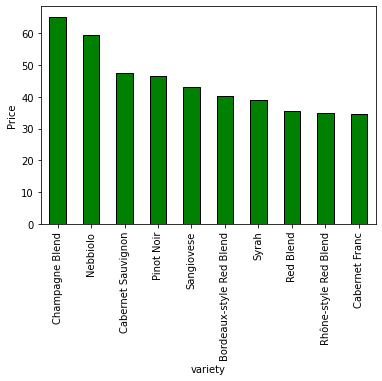

In [26]:
processed_data.groupby('variety')['price'].mean().sort_values(ascending = False)[:10].plot.bar(edgecolor = 'k', color='g')

plt.ylabel('Price')

plt.show()

In [27]:
processed_data.groupby('country')['price'].mean().sort_values(ascending=False)

country
Italy          44.011084
Germany        43.328036
France         38.776963
US             37.366163
Austria        30.358879
Other          27.886942
Spain          27.761525
New Zealand    26.518287
Argentina      25.419455
Portugal       22.128871
Chile          20.912833
Name: price, dtype: float64

<b>Top 10 countries who sell most costly wines</b>

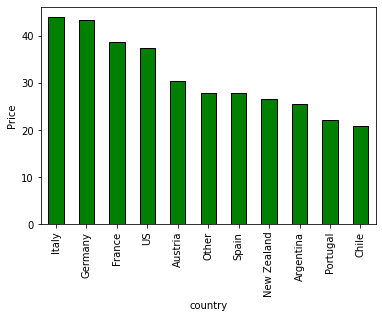

In [28]:
processed_data.groupby('country')['price'].mean().sort_values(ascending = False).plot.bar(edgecolor = 'k', color='g')

plt.ylabel('Price')

plt.show()

## FEATURE SELECTION

In [29]:
cross_tabel = pd.crosstab(processed_data['variety'], processed_data['user_name'])

s,p,d,e = stat.chi2_contingency(cross_tabel)

print(p)

#repeat for each column, p is 0 for each column

0.0


<b>Based on chi2 statistics we do not have any strong evidence that any column is independent of target variable so we will keep every column except review_title and designation.

review_title is basically a combination of location which is a repetation of other columns and designation has lot of null values and also has lot of different labels so It will not have any influence on target variable</b>

# FEATURE ENGINEERING

In [0]:
def clean_review(temp_data,column):
    data = temp_data.copy()

    data[column] = data[column].apply(lambda x:re.sub('[^a-zA-Z ]+','',str(x)))
    
    data[column] = data[column].apply(nltk.word_tokenize)
    
    data[column] = data[column].apply(lambda x:[word.lower() for word in x])   #transform words in lowercase

    data[column] = data[column].apply(lambda x: [word for word in x if word not in stop_words]) #removing stop words 

    data[column] = data[column].apply(lambda x:' '.join(x))    #join all words as sentenance
    return data

<b>Cleaning review description by removing stop words and panctuation, numbers, etc. </b>

In [0]:
NB_cleaned_data = clean_review(processed_data, 'review_description')

In [32]:
vectorizer = CountVectorizer(max_features=5000)

sparse_matrix = vectorizer.fit_transform(NB_cleaned_data['review_description'])

sparse_df = pd.DataFrame.sparse.from_spmatrix(sparse_matrix,
                                              columns=vectorizer.get_feature_names())

print(sparse_df.shape)

sparse_df.head()

(82657, 5000)


,ability,able,abound,abounds,abrasive,abrupt,abruptly,absolute,absolutely,abundance,abundant,abv,acacia,accent,accented,accenting,accents,accentuate,accentuated,accentuates,accentuating,acceptable,accessible,accompanied,accompanies,accompaniment,accompany,accompanying,achieve,achieved,achievement,achieves,acid,aciddriven,acidic,acidity,acids,acidtannin,acre,acres,...,yeast,yeastiness,yeasts,yeasty,yellow,yellowcherry,yellowfruit,yes,yet,yield,yielded,yielding,yields,ynez,yogurt,york,youd,youll,young,younger,yountville,youre,youth,youthful,youthfully,yummy,zealand,zealands,zero,zest,zestiness,zesty,zin,zinfandel,zinfandels,zing,zingy,zins,zip,zippy
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Using Bag Of Word Technique instead of TfIDf because when I explored review_description column,  user have written variety of wine in review so it would be better to use CountVectorizer

In [0]:
encoder_dict = {}

for column in ['user_name', 'country', 'province', 'region_1', 'region_2', 'winery']:
    encoder = OneHotEncoder(sparse=False)
    encoded = encoder.fit_transform(NB_cleaned_data[[column]])
    
    df = pd.DataFrame(encoded, columns=[f"{column}_{x}" for x in ((encoder.categories_[0]).tolist())])
    sparse_df = pd.concat([sparse_df, df], axis=1)
    
    encoder_dict[column] = encoder

Encoding categorical column with one hot encoding which we will create binary value(0 and 1) columns

In [34]:
print(sparse_df.shape)
sparse_df.head()

(82657, 5066)


,ability,able,abound,abounds,abrasive,abrupt,abruptly,absolute,absolutely,abundance,abundant,abv,acacia,accent,accented,accenting,accents,accentuate,accentuated,accentuates,accentuating,acceptable,accessible,accompanied,accompanies,accompaniment,accompany,accompanying,achieve,achieved,achievement,achieves,acid,aciddriven,acidic,acidity,acids,acidtannin,acre,acres,...,province_Mendoza Province,province_New York,province_Oregon,province_Other,province_Piedmont,province_Tuscany,province_Washington,region_1_Alsace,region_1_Barolo,region_1_California,region_1_Champagne,region_1_Columbia Valley (WA),region_1_Mendoza,region_1_Napa Valley,region_1_Other,region_1_Paso Robles,region_1_Russian River Valley,region_1_Willamette Valley,region_2_California Other,region_2_Central Coast,region_2_Central Valley,region_2_Columbia Valley,region_2_Finger Lakes,region_2_Napa,region_2_Napa-Sonoma,region_2_Other,region_2_Sierra Foothills,region_2_Sonoma,region_2_Willamette Valley,winery_Chateau Ste. Michelle,winery_Columbia Crest,winery_Concha y Toro,winery_DFJ Vinhos,winery_Georges Duboeuf,winery_Kendall-Jackson,winery_Louis Latour,winery_Other,winery_Testarossa,winery_Williams Selyem,winery_Wines & Winemakers
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [35]:
target_encoder = LabelEncoder()

encoded_target = target_encoder.fit_transform(NB_cleaned_data['variety'])

print(encoded_target.shape)
print(encoded_target)

(82657,)
[ 5 17 11 ...  6  0  3]


# MODEL DEVELOPMENT

### NAIVE BAYES MODEL(BASE MODEL)

In [0]:
nb_trainx, nb_testx, nb_trainy, nb_testy = train_test_split(sparse_df, encoded_target, 
                                                            test_size=.2, shuffle=True, stratify=encoded_target)

In [39]:
bnb_model = BernoulliNB()

bnb_model.fit(nb_trainx, nb_trainy)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [40]:
bnb_model.score(nb_testx, nb_testy)

0.633861601742076

<b>We got approximately 63.5% accuracy from our base model</b>

For processing test data we can use below function and then we can use that processed test data to predict label by our bnb_model 

But I will explore another model then I will decide which is better to predict test dataset.

In [0]:
def process_testdata_vectorized(temp_data, top_values, vectorizer, encoder_dict):
    data = temp_data.copy()
    
    data['price'] = np.where((data.price < 1000), data.price, data.price.median())
    data['points'] = np.where((data.points < 100), data.points, data.points.mean())
    
    for column in ['user_name', 'country', 'designation', 'province', 'region_1', 'region_2', 'winery']:
        data[column] = data[column].apply(lambda x: 'Other' if x not in top_values[column] else x)
        
    data['user_name'] = data['user_name'].apply(lambda x:re.sub('[^a-zA-Z ]+','',str(x)))
    
    data = data.drop(columns=['review_title', 'designation'])
    
    data = clean_review(data, 'review_description')
    
    sparse_matrix = vectorizer.transform(data['review_description'])

    sparse_input = pd.DataFrame.sparse.from_spmatrix(sparse_matrix, columns=vectorizer.get_feature_names())
    
    for column in ['user_name', 'country', 'province', 'region_1', 'region_2', 'winery']:
        encoded_input = encoder_dict[column].transform(data[[column]])
        
        df_input = pd.DataFrame(encoded_input, columns=[f"{column}_{x}" for x in ((encoder_dict[column].categories_[0]).tolist())])
        
        sparse_input = pd.concat([sparse_input, df_input], axis=1)

    return sparse_input

In [0]:
bnb_input_data = process_testdata_vectorized(test_data, top_values, vectorizer, encoder_dict)

In [43]:
print(bnb_input_data.shape)
bnb_input_data.head()

(20665, 5066)


,ability,able,abound,abounds,abrasive,abrupt,abruptly,absolute,absolutely,abundance,abundant,abv,acacia,accent,accented,accenting,accents,accentuate,accentuated,accentuates,accentuating,acceptable,accessible,accompanied,accompanies,accompaniment,accompany,accompanying,achieve,achieved,achievement,achieves,acid,aciddriven,acidic,acidity,acids,acidtannin,acre,acres,...,province_Mendoza Province,province_New York,province_Oregon,province_Other,province_Piedmont,province_Tuscany,province_Washington,region_1_Alsace,region_1_Barolo,region_1_California,region_1_Champagne,region_1_Columbia Valley (WA),region_1_Mendoza,region_1_Napa Valley,region_1_Other,region_1_Paso Robles,region_1_Russian River Valley,region_1_Willamette Valley,region_2_California Other,region_2_Central Coast,region_2_Central Valley,region_2_Columbia Valley,region_2_Finger Lakes,region_2_Napa,region_2_Napa-Sonoma,region_2_Other,region_2_Sierra Foothills,region_2_Sonoma,region_2_Willamette Valley,winery_Chateau Ste. Michelle,winery_Columbia Crest,winery_Concha y Toro,winery_DFJ Vinhos,winery_Georges Duboeuf,winery_Kendall-Jackson,winery_Louis Latour,winery_Other,winery_Testarossa,winery_Williams Selyem,winery_Wines & Winemakers
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


### CATBOOST MODEL

Catboost is a <b>boosting tree approach</b> which is optimized for categorical features.

When using these model we don't even have to encode our categorical and text data. It takes of everything with some parameters.

These model was developed by yandex and documentation can be found at <b>catboost.ai</b>

How Catboost Works?

Well it has different techniques to encode categorical data which includes one_hot_encoding, Counter, BinarizedTargetMeanValue, etc.

<b>We can decide how categorical and text is processed by parameters.</b>


In [44]:
processed_data.head()

,user_name,country,review_title,review_description,designation,points,price,province,region_1,region_2,winery,variety
0,Other,Other,Andrew Peace 2007 Peace Family Vineyard Chardo...,"Classic Chardonnay aromas of apple, pear and h...",Other,83.0,10.0,Other,Other,Other,Other,Chardonnay
1,wawinereport,US,North by Northwest 2014 Red (Columbia Valley (...,This wine is near equal parts Syrah and Merlot...,Other,89.0,15.0,Washington,Columbia Valley (WA),Columbia Valley,Other,Red Blend
2,Other,Italy,Renato Ratti 2007 Conca (Barolo),Barolo Conca opens with inky dark concentratio...,Other,94.0,80.0,Piedmont,Barolo,Other,Other,Nebbiolo
3,vossroger,France,Domaine l'Ancienne Cure 2010 L'Abbaye White (B...,It's impressive what a small addition of Sauvi...,Other,87.0,22.0,Other,Other,Other,Other,Bordeaux-style White Blend
4,vossroger,France,Château du Cèdre 2012 Le Cèdre Vintage Malbec ...,"This ripe, sweet wine is rich and full of drie...",Other,88.0,33.0,Other,Other,Other,Other,Malbec


In [0]:
target = processed_data['variety']

catboost_data = processed_data.drop(columns=['review_title', 'variety', 'designation'])

In [46]:
catboost_data.head()

,user_name,country,review_description,points,price,province,region_1,region_2,winery
0,Other,Other,"Classic Chardonnay aromas of apple, pear and h...",83.0,10.0,Other,Other,Other,Other
1,wawinereport,US,This wine is near equal parts Syrah and Merlot...,89.0,15.0,Washington,Columbia Valley (WA),Columbia Valley,Other
2,Other,Italy,Barolo Conca opens with inky dark concentratio...,94.0,80.0,Piedmont,Barolo,Other,Other
3,vossroger,France,It's impressive what a small addition of Sauvi...,87.0,22.0,Other,Other,Other,Other
4,vossroger,France,"This ripe, sweet wine is rich and full of drie...",88.0,33.0,Other,Other,Other,Other


In [0]:
train_x, test_x, train_y, test_y = train_test_split(catboost_data, target, test_size=.2, shuffle=True, stratify=target)

train_pool = Pool(train_x, train_y, cat_features=[0, 1, 5, 6, 7, 8], text_features=[2])

val_pool = Pool(test_x, test_y, cat_features=[0, 1, 5, 6, 7, 8], text_features=[2])

<b>We need to specify index of columns which contains categorical and textual data</b>

In [0]:
params = {'iterations':100,
          'learning_rate':0.1,
          'eval_metric':'Accuracy',
          'loss_function':"MultiClass",
          'verbose':True,
          'early_stopping_rounds':5,
          'max_depth':8
         }

model = CatBoostClassifier(**params) 

In [49]:
model.fit(train_pool, eval_set= val_pool, use_best_model=True)

0:	learn: 0.1309338	test: 0.1406363	best: 0.1406363 (0)	total: 46.4s	remaining: 1h 16m 38s
1:	learn: 0.1651115	test: 0.1719090	best: 0.1719090 (1)	total: 1m 31s	remaining: 1h 14m 33s
2:	learn: 0.1662911	test: 0.1711227	best: 0.1719090 (1)	total: 2m 17s	remaining: 1h 14m 12s
3:	learn: 0.2522949	test: 0.2567143	best: 0.2567143 (3)	total: 3m 3s	remaining: 1h 13m 12s
4:	learn: 0.3536938	test: 0.3577910	best: 0.3577910 (4)	total: 3m 47s	remaining: 1h 12m 7s
5:	learn: 0.3984121	test: 0.3956569	best: 0.3956569 (5)	total: 4m 32s	remaining: 1h 11m 1s
6:	learn: 0.4005595	test: 0.4017663	best: 0.4017663 (6)	total: 5m 14s	remaining: 1h 9m 40s
7:	learn: 0.4170284	test: 0.4144689	best: 0.4144689 (7)	total: 5m 58s	remaining: 1h 8m 38s
8:	learn: 0.4395766	test: 0.4347326	best: 0.4347326 (8)	total: 6m 46s	remaining: 1h 8m 27s
9:	learn: 0.4487864	test: 0.4454391	best: 0.4454391 (9)	total: 7m 30s	remaining: 1h 7m 34s
10:	learn: 0.4613837	test: 0.4487055	best: 0.4487055 (10)	total: 8m 13s	remaining: 1h 6m

Training accuracy is : <b>67.5%</b>

We got <b>66.7%</b> accuracy on validation data which is really greate since we had 17 different labels. 

In [50]:
print(model.get_all_params())

{'nan_mode': 'Min', 'eval_metric': 'Accuracy', 'combinations_ctr': ['Borders:CtrBorderCount=15:CtrBorderType=Uniform:TargetBorderCount=27:TargetBorderType=MinEntropy:Prior=0/1:Prior=0.5/1:Prior=1/1', 'Counter:CtrBorderCount=15:CtrBorderType=Uniform:Prior=0/1'], 'iterations': 100, 'sampling_frequency': 'PerTree', 'fold_permutation_block': 0, 'leaf_estimation_method': 'Newton', 'od_pval': 0, 'counter_calc_method': 'SkipTest', 'grow_policy': 'SymmetricTree', 'penalties_coefficient': 1, 'boosting_type': 'Plain', 'model_shrink_mode': 'Constant', 'feature_border_type': 'GreedyLogSum', 'ctr_leaf_count_limit': 18446744073709551615, 'bayesian_matrix_reg': 0.10000000149011612, 'one_hot_max_size': 2, 'l2_leaf_reg': 3, 'random_strength': 1, 'od_type': 'Iter', 'rsm': 1, 'boost_from_average': False, 'max_ctr_complexity': 1, 'model_size_reg': 0.5, 'simple_ctr': ['Borders:CtrBorderCount=15:CtrBorderType=Uniform:TargetBorderCount=27:TargetBorderType=MinEntropy:Prior=0/1:Prior=0.5/1:Prior=1/1', 'Counter

In [51]:
model.score(train_pool)

0.6755387523629489

In [52]:
model.score(val_pool)

0.6668279699975804

In [0]:
def process_testdata_catboost(temp_data, top_values):
    data = temp_data.copy()
    data['price'] = np.where((data.price < 1000), data.price, data.price.median())
    data['points'] = np.where((data.points < 100), data.points, data.points.mean())
    
    for column in ['user_name', 'country', 'designation', 'province', 'region_1', 'region_2', 'winery']:
        data[column] = data[column].apply(lambda x: 'Other' if x not in top_values[column] else x)
        
    data['user_name'] = data['user_name'].apply(lambda x:re.sub('[^a-zA-Z ]+','',str(x)))
    
    data = data.drop(columns=['review_title', 'designation'])
    
    input_pool = Pool(data, cat_features=[0, 1, 5, 6, 7, 8], text_features=[2])
    
    return input_pool

In [0]:
input_test_data = process_testdata_catboost(test_data, top_values)

In [0]:
test_target = model.predict(input_test_data, prediction_type='Class')

In [93]:
test_target_series = pd.Series(test_target.flatten())
print(test_target_series)

0                Pinot Noir
1                    Malbec
2        Cabernet Sauvignon
3                    Malbec
4                Sangiovese
                ...        
20660            Pinot Noir
20661                  Rosé
20662    Cabernet Sauvignon
20663       Sparkling Blend
20664    Cabernet Sauvignon
Length: 20665, dtype: object


In [0]:
test_pred_df = pd.concat((test_data, test_target_series), axis=1)

In [98]:
test_pred_df = test_pred_df.rename(columns = {0:'variety'})

test_pred_df.head()

,user_name,country,review_title,review_description,designation,points,price,province,region_1,region_2,winery,variety
0,@paulgwine,US,Boedecker Cellars 2011 Athena Pinot Noir (Will...,Nicely differentiated from the companion Stewa...,Athena,88,35.0,Oregon,Willamette Valley,Willamette Valley,Boedecker Cellars,Pinot Noir
1,@wineschach,Argentina,Mendoza Vineyards 2012 Gran Reserva by Richard...,"Charred, smoky, herbal aromas of blackberry tr...",Gran Reserva by Richard Bonvin,90,60.0,Mendoza Province,Mendoza,NaN,Mendoza Vineyards,Malbec
2,@vboone,US,Prime 2013 Chardonnay (Coombsville),"Slightly sour and funky in earth, this is a re...",NaN,87,38.0,California,Coombsville,Napa,Prime,Cabernet Sauvignon
3,@wineschach,Argentina,Bodega Cuarto Dominio 2012 Chento Vineyard Sel...,"This concentrated, midnight-black Malbec deliv...",Chento Vineyard Selection,91,20.0,Mendoza Province,Mendoza,NaN,Bodega Cuarto Dominio,Malbec
4,@kerinokeefe,Italy,SassodiSole 2012 Brunello di Montalcino,"Earthy aromas suggesting grilled porcini, leat...",NaN,90,49.0,Tuscany,Brunello di Montalcino,NaN,SassodiSole,Sangiovese


In [0]:
test_pred_df.to_csv('C:/Users/RetailAdmin/Desktop/Knight ML Assignment/Data/final_wine_variety.csv', index=False) 